# Project: Style Spotter

  
    
## Notebook Contents:
### 1. Data Preparation/Cleaning
### 2. Image Pre-Processing
       1. Resizing without Aspect Change
       2. Zero Padding
       3. Centering Image
### 3. Data Exploration 
       - Imbalanced Classes

    




## Note: The sections below should not be re-run as they include:
1. Data Cleaning
2. Pre-processing images
3. Storage of pre-processed images in new folders
     
     
     

## Part 1: Data Preparation/Cleaning

In [1]:
! pip install theano

In [262]:
! pip install jupyter_nbextensions_configurator
    

  Using cached jupyter_nbextensions_configurator-0.2.8-py2.py3-none-any.whl
  Using cached jupyter_contrib_core-0.3.3-py2.py3-none-any.whl
  Using cached python_dateutil-2.6.1-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/local/lib/python2.7/dist-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/usr/local/lib/python2.7/dist-packages/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_d

In [255]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

# For this example, hide these names, just to avoid polluting the namespace further
get_ipython().user_ns_hidden['widgets'] = widgets
get_ipython().user_ns_hidden['NamespaceMagics'] = NamespaceMagics

In [256]:
class VariableInspectorWindow(object):
    instance = None

    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")

        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell

        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]

        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)

    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable
        Inspector."""
        self._box._ipython_display_()


In [257]:
inspector = VariableInspectorWindow(get_ipython())
inspector

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

In [254]:
! pip install jupyter_contrib_nbextensions



  Using cached jupyter_contrib_nbextensions-0.3.3-py2.py3-none-any.whl
  Using cached jupyter_nbextensions_configurator-0.2.8-py2.py3-none-any.whl
  Using cached lxml-4.1.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached jupyter_highlight_selected_word-0.1.0-py2.py3-none-any.whl
  Using cached jupyter_contrib_core-0.3.3-py2.py3-none-any.whl
  Using cached python_dateutil-2.6.1-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/local/lib/python2.7/dist-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/local/lib/python2.7/dist-packa

In [2]:
import pandas as pd

In [3]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import pickle 

In [14]:
from PIL import Image, ImageChops

In [7]:
Cat_data = pd.read_csv('/home/ubuntu/data/Anno/category_img.csv', sep=",")

In [8]:
Cat_data

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [9]:
Cat_name = pd.read_csv('/home/ubuntu/data/Anno/category_cloth.csv', sep=",") # Add Category names and types using dictionaries

In [10]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [11]:
dict_Cat = Cat_name.set_index('category_label').T.to_dict('list')

In [12]:
dict_Cat

{1: ['Anorak', 1],
 2: ['Blazer', 1],
 3: ['Blouse', 1],
 4: ['Bomber', 1],
 5: ['Button-Down', 1],
 6: ['Cardigan', 1],
 7: ['Flannel', 1],
 8: ['Halter', 1],
 9: ['Henley', 1],
 10: ['Hoodie', 1],
 11: ['Jacket', 1],
 12: ['Jersey', 1],
 13: ['Parka', 1],
 14: ['Peacoat', 1],
 15: ['Poncho', 1],
 16: ['Sweater', 1],
 17: ['Tank', 1],
 18: ['Tee', 1],
 19: ['Top', 1],
 20: ['Turtleneck', 1],
 21: ['Capris', 2],
 22: ['Chinos', 2],
 23: ['Culottes', 2],
 24: ['Cutoffs', 2],
 25: ['Gauchos', 2],
 26: ['Jeans', 2],
 27: ['Jeggings', 2],
 28: ['Jodhpurs', 2],
 29: ['Joggers', 2],
 30: ['Leggings', 2],
 31: ['Sarong', 2],
 32: ['Shorts', 2],
 33: ['Skirt', 2],
 34: ['Sweatpants', 2],
 35: ['Sweatshorts', 2],
 36: ['Trunks', 2],
 37: ['Caftan', 3],
 38: ['Cape', 3],
 39: ['Coat', 3],
 40: ['Coverup', 3],
 41: ['Dress', 3],
 42: ['Jumpsuit', 3],
 43: ['Kaftan', 3],
 44: ['Kimono', 3],
 45: ['Nightdress', 3],
 46: ['Onesie', 3],
 47: ['Robe', 3],
 48: ['Romper', 3],
 49: ['Shirtdress', 3],
 5

In [13]:
Cat_data.columns

Index(['image_name', 'category_label'], dtype='object')

In [16]:
#Full_df = Cat_data.filter(['image_name','category_label'])

In [17]:
Full_df

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [18]:
#Full_df['category_name'] = 0
#Full_df['category_type'] = 0

In [19]:
Full_df.head(2)

,image_name,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,0,0


In [20]:
dict_Cat[1]

['Anorak', 1]

In [ ]:
'''
%%time
for index, row in Full_df.iterrows():
    label = Full_df.iloc[index,1] 
    Full_df.iloc[index,2] = dict_Cat[label][0]
    Full_df.iloc[index,3] = dict_Cat[label][1]
'''

CPU times: user 26min 38s, sys: 24 ms, total: 26min 38s
Wall time: 26min 38s


In [23]:
Full_df

,image_name,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3,Blouse,1
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3,Blouse,1
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1


In [24]:
len(Full_df)

289222

In [25]:
pathlist = list(Full_df['image_name'])

In [26]:
pathlist

['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000002.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000003.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000004.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000005.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000006.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000007.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000008.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000009.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000010.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000011.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000012.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000013.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000014.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000015.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000016.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000017.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000018.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000019.jpg',
 'img/Sheer_

In [25]:
len(pathlist)

289222

In [26]:
Full_df.image_name.nunique()

289222

### 4 categories clubed under Dress so there are total of 50-4=46 categories

In [27]:
Full_df.category_name.nunique()

46

In [28]:
import glob
import scipy

In [45]:
filenames = glob.glob("/home/ubuntu/data/img/*/*.jpg")

In [46]:
filenames

['/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000007.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000024.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000005.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000036.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000032.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000023.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000049.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000003.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000033.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000006.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000030.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000014.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000016.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000020.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000047.jpg',
 '/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000025.jpg',
 '/home/

In [47]:
len(filenames)

289229

In [48]:
filenames[0]

'/home/ubuntu/data/img/D-Ring_Collar_Coat/img_00000007.jpg'

In [49]:
'/'.join(filenames[0].split('/')[-3:])

'img/D-Ring_Collar_Coat/img_00000007.jpg'

In [50]:
shortname = ['/'.join(x.split('/')[-3:]) for x in filenames]

In [51]:
shortname

['img/D-Ring_Collar_Coat/img_00000007.jpg',
 'img/D-Ring_Collar_Coat/img_00000024.jpg',
 'img/D-Ring_Collar_Coat/img_00000005.jpg',
 'img/D-Ring_Collar_Coat/img_00000036.jpg',
 'img/D-Ring_Collar_Coat/img_00000032.jpg',
 'img/D-Ring_Collar_Coat/img_00000023.jpg',
 'img/D-Ring_Collar_Coat/img_00000049.jpg',
 'img/D-Ring_Collar_Coat/img_00000003.jpg',
 'img/D-Ring_Collar_Coat/img_00000033.jpg',
 'img/D-Ring_Collar_Coat/img_00000006.jpg',
 'img/D-Ring_Collar_Coat/img_00000030.jpg',
 'img/D-Ring_Collar_Coat/img_00000014.jpg',
 'img/D-Ring_Collar_Coat/img_00000016.jpg',
 'img/D-Ring_Collar_Coat/img_00000020.jpg',
 'img/D-Ring_Collar_Coat/img_00000047.jpg',
 'img/D-Ring_Collar_Coat/img_00000025.jpg',
 'img/D-Ring_Collar_Coat/img_00000040.jpg',
 'img/D-Ring_Collar_Coat/img_00000037.jpg',
 'img/D-Ring_Collar_Coat/img_00000038.jpg',
 'img/D-Ring_Collar_Coat/img_00000031.jpg',
 'img/D-Ring_Collar_Coat/img_00000013.jpg',
 'img/D-Ring_Collar_Coat/img_00000028.jpg',
 'img/D-Ring_Collar_Coat/img_000

In [52]:
len(shortname)

289229

### Difference between pathlist(Annotation/DF) and shortname(actaual files)
Actual files are 7 more than Anno/DF has. They are listed below. (so no issues)

In [53]:
len(pathlist)-len(shortname)

-7

In [55]:
missinglist= []

### items that are missing in  Annotation/DF but present in folders --no action needed ..can be treated as extra

In [56]:
%%time
for x in shortname:
    if x not in pathlist:
        print(x)
        missinglist.append(x)

img/Buttoned_Collarless_Blouse/img_00000080.jpg
img/Tuxedo-Inspired_Blazer/img_00000076.jpg
img/Striped_Twist-Front_Blouse/img_00000078.jpg
img/Tulip_Front_Blazer/img_00000110.jpg
img/Sleek_Draped_Blouse/img_00000022.jpg
img/Split-Back_Pleated_Blouse/img_00000114.jpg
img/Striped_Mandarin_Collar_Blouse/img_00000055.jpg
CPU times: user 9min 24s, sys: 12 ms, total: 9min 24s
Wall time: 9min 24s


In [57]:
len(missinglist)

7

### Items which are missing in actual files ---> none

In [58]:
missingDF = []

In [59]:
%%time
for x in pathlist:
    if x not in shortname:
        print(x)
        missingDF.append(x)

CPU times: user 9min 24s, sys: 20 ms, total: 9min 24s
Wall time: 9min 24s


In [60]:
missingDF

[]

## Part 2: Image Pre-Processing

## Making empty folders for processed images 
make a new dir process_img
make directories within it using names from the exisitng directoris

In [66]:
#new_folders = []

In [75]:
#trying on one folder
#extract the 2nd folder inside image from the path and add new folder name 'process_img' at the start of path


x ='img/D-Ring_Collar_Coat/img_00000007.jpg'.split('/')[-2]
x = 'process_img/' +x
x

'process_img/D-Ring_Collar_Coat'

In [76]:
#create folder 
#os.makedirs(x)

In [167]:
# Creating all the new folders onside 'process_img'
'''
for old in shortname:
    newfolder =old.split('/')[-2]
    newfolder = 'process_img/' + newfolder
    if not os.path.exists(newfolder):
        os.makedirs(newfolder)
'''

## Image Pre-Processing

In [30]:
# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 3

In [168]:
path1 = '/home/ubuntu/data/img' 
path2 = '/home/ubuntu/data/process_img'

## No. of folders that describe category and Attributes are 5621 + 1 hidden folder .7z

In [169]:
#dirlist = os.listdir(path1) # list of directories within directory img

In [170]:
len(dirlist)

5622

In [171]:
dirlist[:5]

['D-Ring_Collar_Coat',
 'Dot-Patterned_Tank',
 'Heathered_Seamless_Capri_Leggings',
 'Mandarin_Collar_Blouse',
 'Keyhole_Babydoll_Dress']

## Removing hidden folder from dirlist

In [172]:
#dirlist[4946]

'.7z'

In [173]:
dirlist.remove('.7z') 

In [174]:
#dirlist[4946]

'Collarless_Popover_Blouse'

In [175]:
#imlist = os.listdir(path1+'/'+dirlist[0])  # list of images within directory img/D-Ring_Collar_Coat

In [176]:
imlist[:5]

['img_00000007.jpg',
 'img_00000024.jpg',
 'img_00000005.jpg',
 'img_00000036.jpg',
 'img_00000032.jpg']

In [177]:
Image.open(path1+'/'+dirlist[0]+'/'+imlist[0]).size

(209, 300)

## Applying Pre-processing to all 289229 images  
##  --> No need to run section below again as Images are already processed and saved in folder

####  Pre-Processing Steps:
1. Resizing without Aspect Change
2. Zero Padding
3. Centering Image

Note: Processed images stored in folder '/home/ubuntu/data/process_img'

In [ ]:
%%time
size = (200,200)   #image size requried post processing
'''
for i in range(len(dirlist)):
    imlist = os.listdir(path1+'/'+dirlist[i]) #within each directory of image a new list of images needs to be created
    for j in range(len(imlist)):
        image = Image.open(path1+'/'+dirlist[i]+'/'+imlist[j])   # reads in image from input folder  #Image size change: (205, 300)
                         
        #thumbnail operation to bring the image down to within your original bounds(200,200) and preserving the aspect
        image.thumbnail(size, Image.ANTIALIAS)     # Image size change -aspect remains: (136, 200)
        image_size = image.size 

        #Then it crops it back out to actually fill the size of your bounds # Image size change:(200,200)
        thumb = image.crop( (0, 0, size[0], size[1]) )
    
        #image is offset to the center, so you end up with black padding but no image cropping 
        # Image size no change:(200,200)
        offset_x = max( int((size[0] - image_size[0]) / 2), 0 )
        offset_y = max( int((size[1] - image_size[1]) / 2), 0 )

        thumb = ImageChops.offset(thumb, offset_x, offset_y)
        thumb.save(path2+'/'+dirlist[i]+'/'+imlist[j])
print('Finished')
'''

In [183]:
#check for hidden folders within img folder
for i,v  in enumerate(dirlist):
    if '..' in v:
        print('yes')
        print(i,v)

#### Check if all the images have been created in process_img folders  ---> should be equal to 28229

In [43]:
#process_files = glob.glob("/home/ubuntu/data/process_img/*/*.jpg")

In [44]:
len(process_files)

289229


## Part 3: Data Exploration 
####                Imbalanced Classes

#### Creating a cloumn in Full_df with path to processed images


In [45]:
#Full_df.columns

Index(['image_name', 'category_label', 'category_name', 'category_type'], dtype='object')

In [46]:
#Full_df['Process_Files'] = Full_df['image_name'].str.replace('img','process_img',1) #1ensures only 1st img is replaced

In [47]:
#Full_df['Process_Files'][0]

'process_img/Sheer_Pleated-Front_Blouse/img_00000001.jpg'

In [48]:
#Full_df.head(2)
'''

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


In [51]:
#run only if Full_df changed
'''
with open('../data/Full_df.pkl', 'wb') as picklefile:
    pickle.dump(Full_df, picklefile)
'''

"\nwith open('../data/Full_df.pkl', 'wb') as picklefile:\n    pickle.dump(Full_df, picklefile)\n"

#### ---> Start running notebook from below for any further analyis 

In [15]:
with open("../data/Full_df.pkl", 'rb') as picklefile: 
    Full_df = pickle.load(picklefile)

In [16]:
Full_df.head(5)

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


#### Check category type & counts

Categories ---> 1 to 48

In [17]:
Full_df[Full_df['category_label']==48].category_name.unique()

array(['Romper'], dtype=object)

In [18]:
Full_df[Full_df['category_label']==41].category_name.count()

72158

## Classes are imbalanced


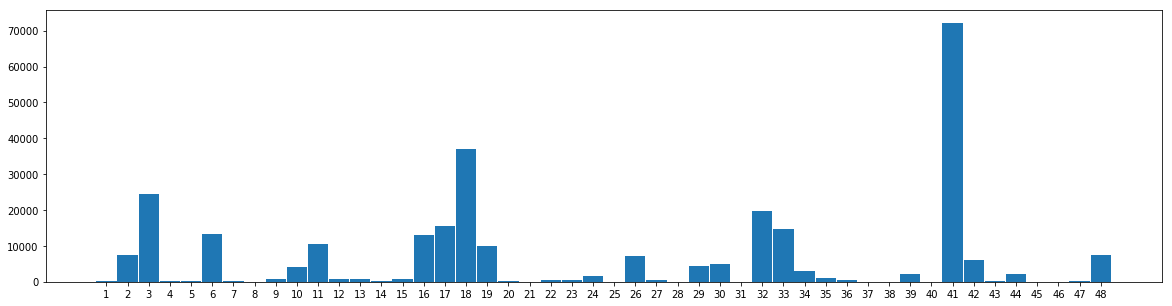

In [19]:
hist, bins = np.histogram(Full_df['category_label'], bins=48)
plt.figure(figsize=(20,5))
width = .98 * (bins[1] - bins[0])
plt.bar(np.arange(1,49), hist, align='center', width=width)
plt.xticks(np.arange(1,49))
plt.show()

Analysis:  
Select 20 categories that have over 2000 examples:  
Categories that are oversampled:    
Categor Name & Label    
Dress - 41
Tee -18
Blouse - 3
Shorts - 32
Tank -17
Skirt - 33
Cardigan - 6
Sweater - 16
Jacket - 11
Top - 19
Blazer -2 
Romper -48
Jeans -26
Jumpsuit -42
Leggings -30
Joggers - 29
Hoodie - 10
Sweatpants -34
Kimono -44
Coat - 39


#### Category Search

In [21]:
Cat_name.iloc[43,:]

category_name     Kimono
category_type          3
category_label        44
Name: 43, dtype: object

Sample Sizes for each Category

In [22]:
Full_df.groupby(['category_label','category_name']).count().sort_values(by=['category_type'],ascending=False)

,,image_name,category_type,Process_Files
category_label,category_name,,,
41,Dress,72158,72158,72158
18,Tee,36887,36887,36887
3,Blouse,24557,24557,24557
32,Shorts,19666,19666,19666
17,Tank,15429,15429,15429
33,Skirt,14773,14773,14773
6,Cardigan,13311,13311,13311
16,Sweater,13123,13123,13123
11,Jacket,10467,10467,10467


In [23]:
Full_df.category_label.value_counts()

41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078
2      7495
48     7408
26     7076
42     6153
30     5013
29     4416
10     4048
34     3048
44     2294
39     2120
      ...  
27      594
22      527
23      486
36      386
5       330
7       324
4       309
1       160
47      150
20      146
43      126
14       97
21       77
46       70
37       54
25       49
28       45
31       32
8        17
40       17
Name: category_label, Length: 46, dtype: int64

In [24]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


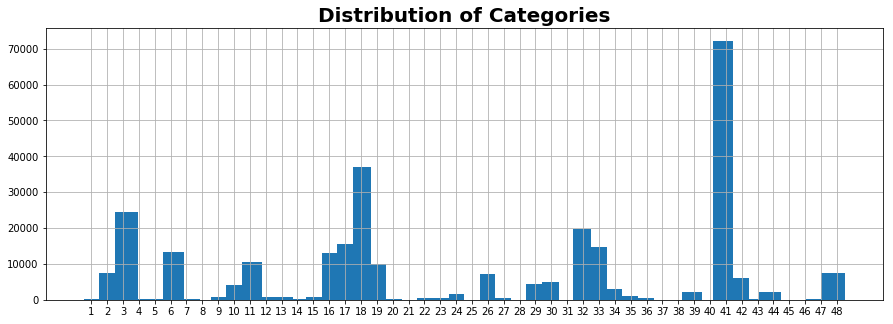

In [25]:
Full_df.hist(column='category_label', figsize=(15,5), bins=48)

'''
mean = Top_NMF_Frame22['Views'].mean()
top25mean= SentiTop25['views_as_of_06162017'].mean()
Bot25mean= SentiBot25['views_as_of_06162017'].mean()
stdiv = SentimentDF['views_as_of_06162017'].std()
print(top25mean)
print(stdiv)

plt.axvline(mean, color='black', linestyle='solid', linewidth=2,label="Overall Mean")
plt.axvline(top25mean, color='red', linestyle='dashed', linewidth=2,label="Top 25 Mean")
plt.axvline(Bot25mean, color='yellow', linestyle='dashed', linewidth=2,label="Bottom 25 Mean")
plt.axvline(mean+2*stdiv, color='blue', linestyle='dashed', linewidth=2,label="Mean+2 Std.Div.")
'''


#plt.xlim(.25, .7)


plt.title('Distribution of Categories',fontsize=20,fontweight='bold')

leg = plt.legend(loc='upper right',fontsize = 15,fancybox=True)
width = .98 * (bins[1] - bins[0])
plt.xticks(np.arange(1, 49,1))
#center = bins[:-1] #+ bins[1:]) / 2
#plt.bar(center, hist, align='center', width=1)
plt.bar(np.arange(1, 49),hist,width=width)

plt.show()

In [26]:
Full_df.category_label.value_counts()

41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078
2      7495
48     7408
26     7076
42     6153
30     5013
29     4416
10     4048
34     3048
44     2294
39     2120
      ...  
27      594
22      527
23      486
36      386
5       330
7       324
4       309
1       160
47      150
20      146
43      126
14       97
21       77
46       70
37       54
25       49
28       45
31       32
8        17
40       17
Name: category_label, Length: 46, dtype: int64